### Late Dark Energy  
Diogo H F de Souza, Sep 5 2023 - Testing CAMBLateDE:  https://github.com/SBU-COSMOLIKE/CAMB  

In [5]:
# Installing Python Packages from a Jupyter Notebook
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

### $\Lambda$CDM: CAMBBase vs CAMBLateDE

In [1]:
# CAMB Base
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBBase/camb


In [2]:
base_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'fluid',
                            w = -1,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
base_results = camb.get_results(base_cosmology)

rho_de = base_results.get_background_densities(scale_factor)['de']
hubble = base_results.hubble_parameter(redshift)
cls = base_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = base_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = base_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBBase/docs/base_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBBase/docs/base_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBBase/docs/base_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBBase/docs/base_pk.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


In [2]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'LateDE',
                            model = 1, w0 = -1,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
latede_results = camb.get_results(latede_cosmology)

rho_de = latede_results.get_background_densities(scale_factor)['de']
hubble = latede_results.hubble_parameter(redshift)
cls = latede_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

In [5]:
filename_background = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_pk.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)

In [61]:
# Comparing CAMBBase with CAMBLateDE
import numpy as np
import matplotlib.pyplot as plt
font_size=15


base_background = np.genfromtxt('/home/grads/data/Diogo/CAMBBase/docs/base_background.txt',unpack=True)
base_cls = np.genfromtxt('/home/grads/data/Diogo/CAMBBase/docs/base_cls.txt',unpack=True)
base_ks = np.genfromtxt('/home/grads/data/Diogo/CAMBBase/docs/base_ks.txt',unpack=True)
base_pk = np.genfromtxt('/home/grads/data/Diogo/CAMBBase/docs/base_pk.txt',unpack=True)

latede_background = np.genfromtxt('/home/grads/data/Diogo/CAMBLateDE/docs/latede_background.txt',unpack=True)
latede_cls = np.genfromtxt('/home/grads/data/Diogo/CAMBLateDE/docs/latede_cls.txt',unpack=True)
latede_ks = np.genfromtxt('/home/grads/data/Diogo/CAMBLateDE/docs/latede_ks.txt',unpack=True)
latede_pk = np.genfromtxt('/home/grads/data/Diogo/CAMBLateDE/docs/latede_pk.txt',unpack=True)

In [62]:
# CAMB BASE outputs
scale_factor = base_background[0]
redshift = 1/scale_factor - 1
base_rhode = base_background[1]
base_hubble = base_background[2]
ells = [i for i in range(len(base_cls))]

# CAMB LATEDE outputs
latede_rhode = latede_background[1]
latede_hubble = latede_background[2]

In [63]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

axislabelfontsize='large'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [13.0,19.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 16,
})
axislabelfontsize='large'

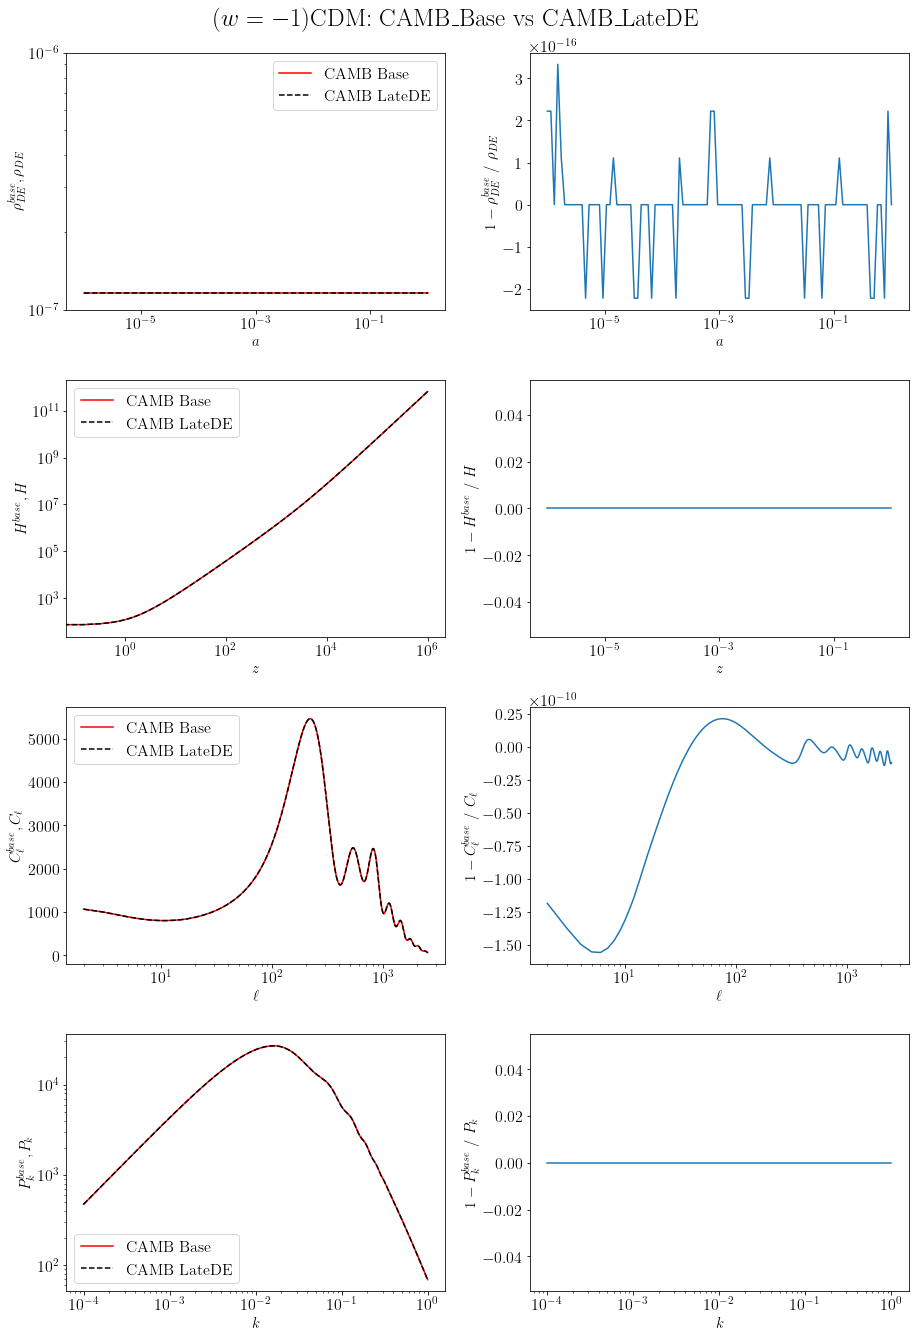

In [66]:
# DE energy density
plt.subplot(4, 2, 1)
plt.loglog(scale_factor,base_rhode/scale_factor**4,'r',label='CAMB Base')
plt.loglog(scale_factor,latede_rhode/scale_factor**4,'k--',label='CAMB LateDE')
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$\rho_{DE}^{base},\rho_{DE}$',fontsize=font_size)
plt.suptitle(r"$(w = -1)$CDM: CAMB\_Base vs CAMB\_LateDE", fontsize=font_size+10)
plt.legend(loc='best')
plt.subplot(4, 2, 2)
plt.semilogx(scale_factor,1-base_rhode/latede_rhode)
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$1-\rho_{DE}^{base}\,\,/\,\,\rho_{DE}$',fontsize=font_size)

# Hubble parameter
plt.subplot(4, 2, 3)
plt.loglog(redshift,base_hubble,'r',label='CAMB Base')
plt.loglog(redshift,latede_hubble,'k--',label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$H^{base},H$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(4, 2, 4)
plt.semilogx(scale_factor,1-base_hubble/latede_hubble)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-H^{base}\,\,/\,\,H$',fontsize=font_size)

# CMB temperature anisotropies
plt.subplot(4,2,5)
plt.semilogx(ells[2:],base_cls[2:],'r',label='CAMB Base')
plt.semilogx(ells[2:],latede_cls[2:],'k--',label='CAMB LateDE')
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$C_\ell^{base},C_\ell$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(4,2,6)
plt.semilogx(ells[2:],1-base_cls[2:]/latede_cls[2:],label='CAMB LateDE')
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$1-C_\ell^{base}\,\,/\,\,C_\ell$',fontsize=font_size)

# Matter power spectra
plt.subplot(4,2,7)
plt.loglog(base_ks,base_pk,'r',label='CAMB Base')
plt.loglog(latede_ks,latede_pk,'k--',label='CAMB LateDE')
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$P_k^{base},P_k$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(4,2,8)
plt.semilogx(base_ks,1-base_pk/latede_pk,label='CAMB LateDE')
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$1-P_k^{base}\,\,/\,\,P_k$',fontsize=font_size)
plt.tight_layout()
plt.savefig("LCDM_CAMBBase_vs_CAMBLateDE.pdf")
plt.show()

### $w$CDM: CAMBBase vs CAMBLateDE

In [1]:
# CAMB Base
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBBase/camb


In [2]:
base_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'fluid',
                            w = -0.8,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
base_results = camb.get_results(base_cosmology)

rho_de = base_results.get_background_densities(scale_factor)['de']
hubble = base_results.hubble_parameter(redshift)
cls = base_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = base_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = base_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBBase/docs/base_w_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBBase/docs/base_w_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBBase/docs/base_w_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBBase/docs/base_w_pk.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)

In [1]:
# CAMB LateDE
import numpy as np
import matplotlib.pyplot as plt
import camb, os, sys

#Check which CAMB is installed
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


In [2]:
latede_cosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'LateDE',
                            model = 1, w0 = -0.8,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

In [3]:
scale_factor = np.logspace(-6, 0, 100)
redshift = 1/scale_factor - 1
latede_results = camb.get_results(latede_cosmology)

rho_de = latede_results.get_background_densities(scale_factor)['de']
hubble = latede_results.hubble_parameter(redshift)
cls = latede_results.get_unlensed_scalar_cls(CMB_unit = 'muK')[:,0]

ks = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[0]
pk = latede_results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)[2]

In [4]:
filename_background = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_w_background.txt'
filename_cls = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_w_cls.txt'
filename_ks = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_w_ks.txt'
filename_pk = '/home/grads/data/Diogo/CAMBLateDE/docs/latede_w_pk.txt'

np.savetxt(filename_background, np.transpose([scale_factor,rho_de,hubble]))
np.savetxt(filename_cls,cls)
np.savetxt(filename_ks,ks)
np.savetxt(filename_pk,pk)

In [67]:
# Comparing CAMBBase with CAMBLateDE
import numpy as np
import matplotlib.pyplot as plt
font_size=15


base_background = np.genfromtxt('/home/grads/data/Diogo/CAMBBase/docs/base_w_background.txt',unpack=True)
base_cls = np.genfromtxt('/home/grads/data/Diogo/CAMBBase/docs/base_w_cls.txt',unpack=True)
base_ks = np.genfromtxt('/home/grads/data/Diogo/CAMBBase/docs/base_w_ks.txt',unpack=True)
base_pk = np.genfromtxt('/home/grads/data/Diogo/CAMBBase/docs/base_w_pk.txt',unpack=True)

latede_background = np.genfromtxt('/home/grads/data/Diogo/CAMBLateDE/docs/latede_w_background.txt',unpack=True)
latede_cls = np.genfromtxt('/home/grads/data/Diogo/CAMBLateDE/docs/latede_w_cls.txt',unpack=True)
latede_ks = np.genfromtxt('/home/grads/data/Diogo/CAMBLateDE/docs/latede_w_ks.txt',unpack=True)
latede_pk = np.genfromtxt('/home/grads/data/Diogo/CAMBLateDE/docs/latede_w_pk.txt',unpack=True)

In [68]:
# CAMB BASE outputs
scale_factor = base_background[0]
redshift = 1/scale_factor - 1
base_rhode = base_background[1]
base_hubble = base_background[2]
ells = [i for i in range(len(base_cls))]

# CAMB LATEDE outputs
latede_rhode = latede_background[1]
latede_hubble = latede_background[2]

In [69]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

axislabelfontsize='large'
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [13.0,19.0]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 16,
})
axislabelfontsize='large'

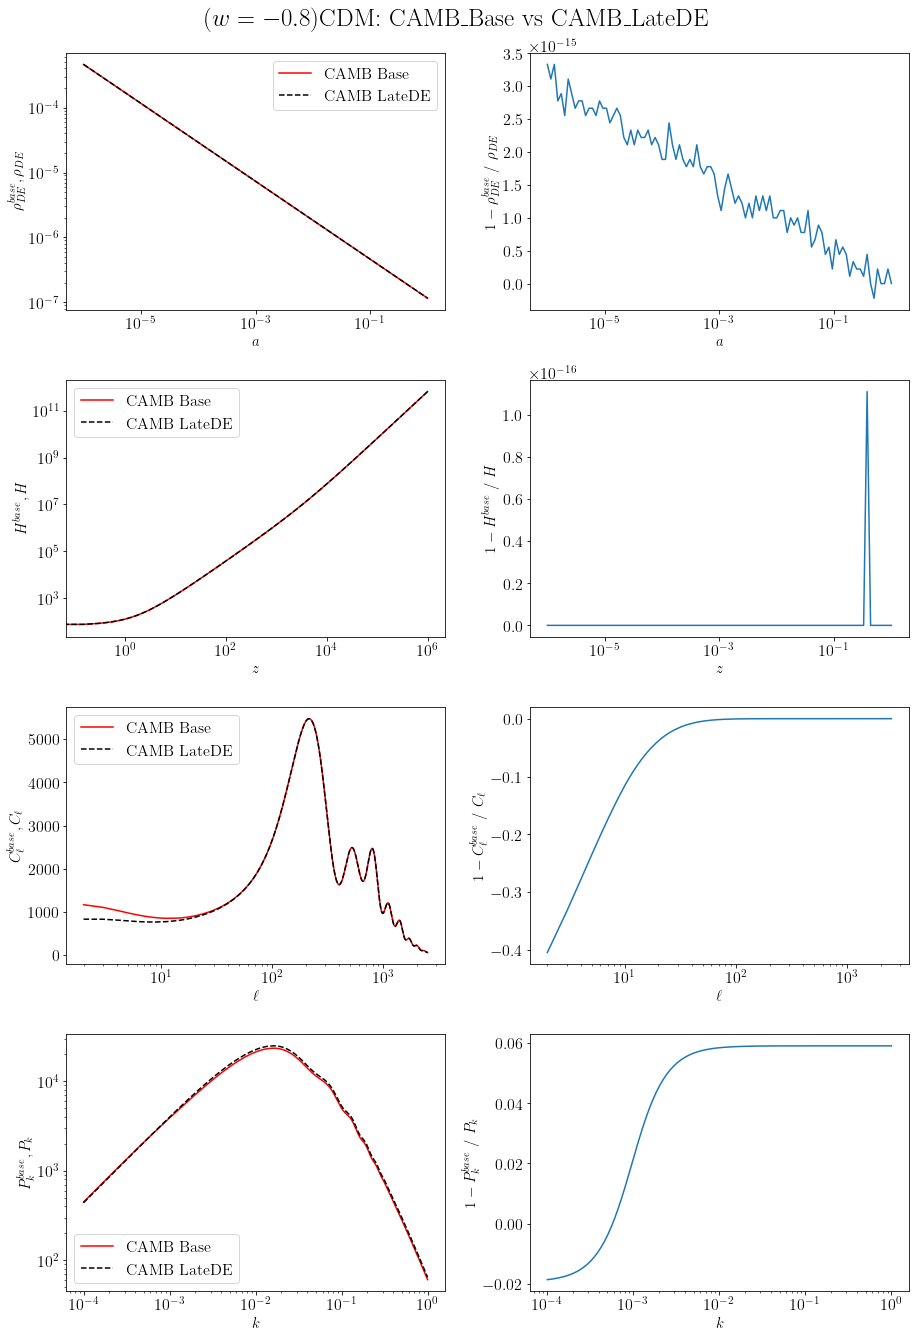

In [70]:
# DE energy density
plt.subplot(4, 2, 1)
plt.loglog(scale_factor,base_rhode/scale_factor**4,'r',label='CAMB Base')
plt.loglog(scale_factor,latede_rhode/scale_factor**4,'k--',label='CAMB LateDE')
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$\rho_{DE}^{base},\rho_{DE}$',fontsize=font_size)
plt.suptitle(r"$(w = -0.8)$CDM: CAMB\_Base vs CAMB\_LateDE", fontsize=font_size+10)

plt.legend(loc='best')
plt.subplot(4, 2, 2)
plt.semilogx(scale_factor,1-base_rhode/latede_rhode)
plt.xlabel('$a$',fontsize=font_size)
plt.ylabel(r'$1-\rho_{DE}^{base}\,\,/\,\,\rho_{DE}$',fontsize=font_size)

# Hubble parameter
plt.subplot(4, 2, 3)
plt.loglog(redshift,base_hubble,'r',label='CAMB Base')
plt.loglog(redshift,latede_hubble,'k--',label='CAMB LateDE')
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$H^{base},H$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(4, 2, 4)
plt.semilogx(scale_factor,1-base_hubble/latede_hubble)
plt.xlabel('$z$',fontsize=font_size)
plt.ylabel(r'$1-H^{base}\,\,/\,\,H$',fontsize=font_size)

# CMB temperature anisotropies
plt.subplot(4,2,5)
plt.semilogx(ells[2:],base_cls[2:],'r',label='CAMB Base')
plt.semilogx(ells[2:],latede_cls[2:],'k--',label='CAMB LateDE')
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$C_\ell^{base},C_\ell$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(4,2,6)
plt.semilogx(ells[2:],1-base_cls[2:]/latede_cls[2:],label='CAMB LateDE')
plt.xlabel('$\ell$',fontsize=font_size)
plt.ylabel(r'$1-C_\ell^{base}\,\,/\,\,C_\ell$',fontsize=font_size)

# Matter power spectra
plt.subplot(4,2,7)
plt.loglog(base_ks,base_pk,'r',label='CAMB Base')
plt.loglog(latede_ks,latede_pk,'k--',label='CAMB LateDE')
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$P_k^{base},P_k$',fontsize=font_size)
plt.legend(loc='best')
plt.subplot(4,2,8)
plt.semilogx(base_ks,1-base_pk/latede_pk,label='CAMB LateDE')
plt.xlabel('$k$',fontsize=font_size)
plt.ylabel(r'$1-P_k^{base}\,\,/\,\,P_k$',fontsize=font_size)
plt.tight_layout()
plt.savefig("wCDM_CAMBBase_vs_CAMBLateDE.pdf")
plt.show()